Title: **NYC Public Assistance Analysis**

Author: Muhammad Tanveer

Date: July 20, 2024

***

# An Analysis of NYC's Social Services Programs

### Business Task
The goal is to gain insights into the distribution of individuals and households receiving government assistance programs such as Supplemental Nutrition Assistance Program (SNAP), Cash Assistance (CA), and Medicaid Benefits (MA) across different boroughs and community districts in New York City.

### Business Objectives
The client aims to better understand the demographic patterns, identify areas with high or low program participation, and inform potential intervention strategies to address social and economic disparities.

### Key Factors
1. **Demographic Patterns:** Understand the demographic characteristics of areas with high program participation
2. **Program Utilization:** Analyze the utilization of SNAP, Cash Assistance, and Medicaid beefits in each borough and community district.
3. **Trends Over Time:** Identify any temporal trends in program enrollment and assess their implications.
4. **Correlation Analysis:** Explore potential correlations between program participation and socio-economic indicators like unemployment rates or poverty levels.
5. **Geospatial Analysis:** Visualize the spatial distribution of program recipients to pinpoint areas of particular concern.

***

## Information on the Data Source
The primary data source is the ["Borough/Community District Report" from NYC OpenData](https://data.cityofnewyork.us/Social-Services/Borough-Community-District-Report/5awp-wfkt). This dataset contains the necessary information to address the client's inquiries.

- **Rows:** 1417
- **Columns:** 9
- Each row is a distinct count of various metrics

### Columns in this Dataset
- Month
- Borough
- Community District (CD)
- Borough Consultation Total SNAP Recipients
- Borough Consultation Total SNAP Households
- Borough Consultation Total Cash Assistance Recipients
- Borough Consultation Total Cash Assistance Cases
- Borough Consultation Total Medicaid Only Enrollees
- Borough Consultation Total Medicaid Enrollees

***

## Preparing and Processing the Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_original = pd.read_csv('./data/Borough_Community_District_Report_20240720.csv')

In [3]:
df_original.head(10)

,Month,Borough,Community District (CD),Borough Consultation Total SNAP Recipients,Borough Consultation Total SNAP Households,Borough Consultation Total Cash Assistance Recipients,Borough Consultation Total Cash Assistance Cases,Borough Consultation Total Medicaid Only Enrollees,Borough Consultation Total Medicaid Enrollees
0,09/01/2018,Bronx,B01,45575,23980,13357,6883,15229,38812
1,09/01/2018,Bronx,B02,22974,12277,7043,3476,7001,19231
2,09/01/2018,Bronx,B03,42384,22379,12901,6632,12512,34441
3,09/01/2018,Bronx,B04,59231,32012,16904,8323,21856,51012
4,09/01/2018,Bronx,B05,58005,30913,17268,8783,19378,47884
5,09/01/2018,Bronx,B06,39784,20964,14218,6801,11148,33520
6,09/01/2018,Bronx,B07,48003,26293,13064,6698,19347,43054
7,09/01/2018,Bronx,B08,16716,9851,3230,1678,8876,16919
8,09/01/2018,Bronx,B09,54113,29193,13743,6718,22259,48762
9,09/01/2018,Bronx,B10,17627,10637,3595,1866,9302,17799


In [4]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Month                                                  1416 non-null   object
 1   Borough                                                1416 non-null   object
 2   Community District (CD)                                1416 non-null   object
 3   Borough Consultation Total SNAP Recipients             1416 non-null   int64 
 4   Borough Consultation Total SNAP Households             1416 non-null   int64 
 5   Borough Consultation Total Cash Assistance Recipients  1416 non-null   int64 
 6   Borough Consultation Total Cash Assistance Cases       1416 non-null   int64 
 7   Borough Consultation Total Medicaid Only Enrollees     1416 non-null   int64 
 8   Borough Consultation Total Medicaid Enrollees          1416

In [5]:
new_cols = {
    'Borough Consultation Total SNAP Recipients': 'Total SNAP Recipients',
    'Borough Consultation Total SNAP Households': 'Total SNAP Households',
    'Borough Consultation Total Cash Assistance Recipients': 'Total Cash Assistance Recipients',
    'Borough Consultation Total Cash Assistance Cases': 'Total Cash Assistance Cases',
    'Borough Consultation Total Medicaid Only Enrollees': 'Total Medicaid Only Enrollees',
    'Borough Consultation Total Medicaid Enrollees': 'Total Medicaid Enrollees'
}
df_renamed = df_original.rename(columns=new_cols)

df_renamed

,Month,Borough,Community District (CD),Total SNAP Recipients,Total SNAP Households,Total Cash Assistance Recipients,Total Cash Assistance Cases,Total Medicaid Only Enrollees,Total Medicaid Enrollees
0,09/01/2018,Bronx,B01,45575,23980,13357,6883,15229,38812
1,09/01/2018,Bronx,B02,22974,12277,7043,3476,7001,19231
2,09/01/2018,Bronx,B03,42384,22379,12901,6632,12512,34441
3,09/01/2018,Bronx,B04,59231,32012,16904,8323,21856,51012
4,09/01/2018,Bronx,B05,58005,30913,17268,8783,19378,47884
...,...,...,...,...,...,...,...,...,...
1411,06/01/2024,Queens,Q13,24097,15430,7427,4547,15315,26908
1412,06/01/2024,Queens,Q14,31786,17595,12586,6103,11588,31849
1413,06/01/2024,Staten_Island,S01,41413,22398,16193,7828,30405,63686
1414,06/01/2024,Staten_Island,S02,19353,11080,4642,2571,2065,6769


In [9]:
df_renamed['Month'] = pd.to_datetime(df_renamed['Month'], format="%m/%d/%Y")

In [10]:
df_renamed['Borough'] = df_renamed['Borough'].astype('string')
df_renamed['Community District (CD)'] = df_renamed['Community District (CD)'].astype('string')

In [13]:
df_renamed.drop(columns=['Month']).describe().T

,count,mean,std,min,25%,50%,75%,max
Total SNAP Recipients,1416.0,28190.225282,15541.111291,1920.0,17252.75,25129.0,39755.50,69384.0
Total SNAP Households,1416.0,16582.077684,8268.580647,1498.0,10629.75,15306.5,22139.50,40427.0
Total Cash Assistance Recipients,1416.0,6875.266949,5031.628069,274.0,3095.00,5078.0,10188.50,23050.0
Total Cash Assistance Cases,1416.0,3779.577684,2566.127630,252.0,1877.75,2946.5,5492.75,12364.0
Total Medicaid Only Enrollees,1416.0,13697.934322,7359.030954,1382.0,8678.75,13003.5,17119.25,47004.0
Total Medicaid Enrollees,1416.0,26644.140537,12882.846762,2497.0,17390.75,26130.5,36745.50,63686.0


***

## Visualizations

### Spatial Distribution of Program Recipients

The following heatmaps visually represents the concentration of public assistance recipients across different community districts within each borough, providing insights into areas with the highest demand for public assistance.

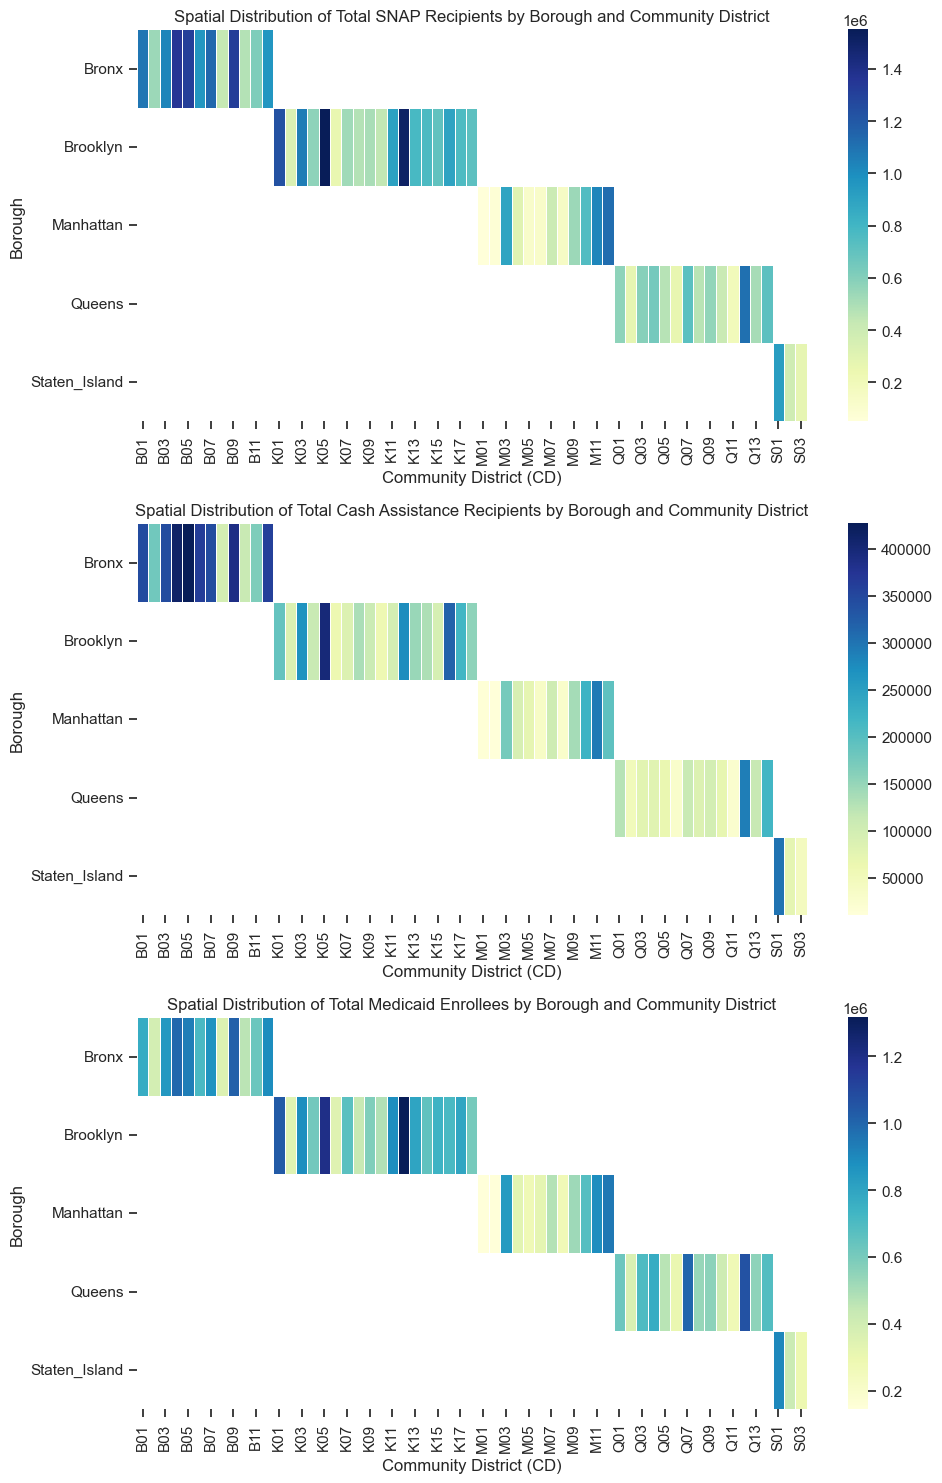

In [15]:
sns.set_theme(style="ticks")
heatmap_values = ['Total SNAP Recipients', 'Total Cash Assistance Recipients', 'Total Medicaid Enrollees']
fig, axes = plt.subplots(nrows=len(heatmap_values), ncols=1, figsize=(10, 5 * len(heatmap_values)))

for i, value in enumerate(heatmap_values):
    heatmap_data = df_renamed.pivot_table(index='Borough', columns='Community District (CD)', values=value, aggfunc='sum')
    plt.sca(axes[i])
    sns.heatmap(heatmap_data, cmap='YlGnBu', fmt=".0f", linewidths=.5)
    axes[i].set_title(f'Spatial Distribution of {value} by Borough and Community District')

plt.tight_layout()
plt.show()

#### Key Findings
- The Bronx has the highest amount of public assistance recipients, indicating a higher demand for assistance in this borough.
- Brooklyn also has high concentrations across all forms of public assistance.
- Most districts in Manhattan do not require as much assistance, despite being more populated.
- Queens and Staten Island have some districts that have medium concentrations for SNAP and Medicaid recipients.

### Time Series Plot - Trends in Public Assistance Enrollment Over Months

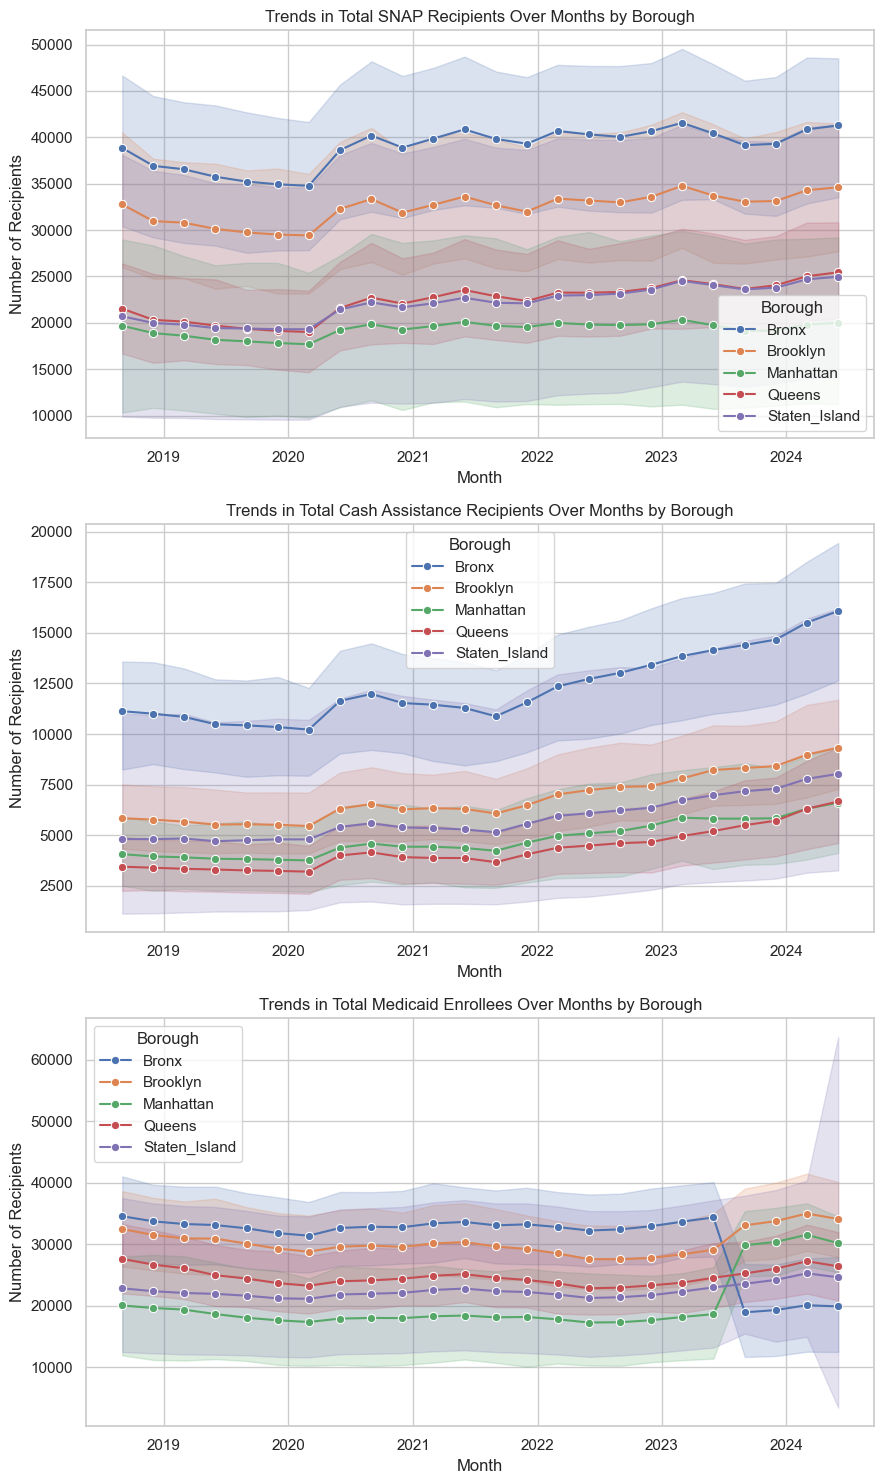

In [17]:
sns.set_theme(style="whitegrid")

time_series_values = ['Total SNAP Recipients', 'Total Cash Assistance Recipients', 'Total Medicaid Enrollees']

fig, axes = plt.subplots(nrows=len(time_series_values), ncols=1, figsize=(9, 5 * len(time_series_values)))

for i, value in enumerate(time_series_values):
    plt.sca(axes[i])
    sns.lineplot(x='Month', y=value, hue='Borough', data=df_renamed, marker='o')
    axes[i].set_title(f'Trends in {value} Over Months by Borough')
    axes[i].set_ylabel('Number of Recipients')
    axes[i].legend(title='Borough')

# Set common x-axis label
axes[-1].set_xlabel('Month')

plt.tight_layout()
plt.show()

#### Key Findings
- There was a sudden increase after March 2020. This is likely due to the COVID-19 pandemic, as the resulting lockdown caused unemployment rates to increase.
- SNAP recipients have not decreased much since the COVID-19 pandemic.
- Cash assistance recipients in all 5 boroughs have been on an upward trend starting December 2021.
- Medicaid enrollees have increased significantly in Manhattan within the last 3 months. This is likely due to the fact that many migrants have moved into Manhattan this year and are eligible for Medicaid for the treatment of emergency medical conditions or parental care.

### Monthly Trends in Program Participation

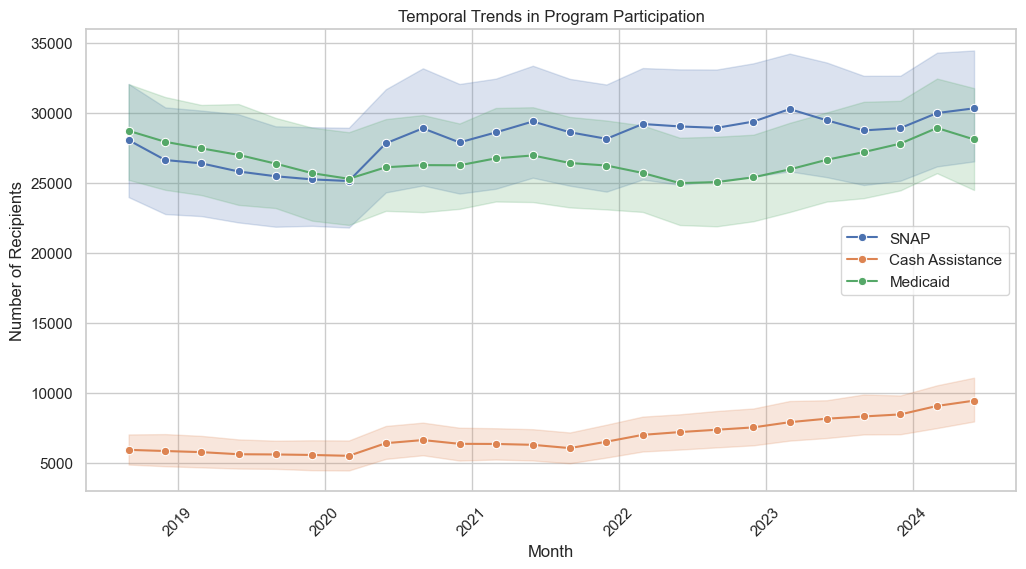

In [19]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(data=df_renamed, x='Month', y='Total SNAP Recipients', label='SNAP', marker='o')
sns.lineplot(data=df_renamed, x='Month', y='Total Cash Assistance Recipients', label='Cash Assistance', marker='o')
sns.lineplot(data=df_renamed, x='Month', y='Total Medicaid Enrollees', label='Medicaid', marker='o')

ax.set_title('Temporal Trends in Program Participation')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Recipients')
ax.legend()
plt.xticks(rotation=45)
plt.show()

#### Key Findings
* SNAP and Medicade recipients have very similar values. It is possible that many of the recipients that receive one of those benefits receive both.
* Cash Assistance recipients do not seem to be correlated with SNAP or Medicaid recipients.

***

## Conclusion
Based on the analysis, it is evident that there are distinct patterns in the distribution of public assistance recipients across New York City boroughs and community districts. The Bronx and Brooklyn show higher concentrations of public assistance recipients, suggesting a greater demand for assistance in these areas. Manhattan, despite being more populated, has lower demand, while Queens and Staten Island have districts with varying levels of need.

The sudden increase in assistance recipients after March 2020 aligns with the onset of the COVID-19 pandemic, reflecting the economic impact and increased unemployment rates during the lockdown. The sustained high levels of SNAP recipients post-pandemic indicate ongoing economic challenges.

Cash assistance recipients have shown an upward trend in all boroughs since December 2021. Meanwhile, Medicaid enrollees have spiked in Manhattan recently, possibly due to an influx of migrants eligible for emergency medical treatment or parental care.

The correlation between SNAP and Medicaid recipients suggests overlap in these programs, while cash assistance recipients do not exhibit a strong correlation with SNAP or Medicaid recipients.

### Application of Insights
- **Resource Allocation:** Allocate resources strategically to address the higher demand for public assistance in specific boroughs and districts, focusing on targeted interventions in areas with the greatest need.
- **Policy Adjustments:** Tailor social welfare policies to address the unique challenges faced by each borough, considering economic disparities, population dynamics, and the lingering impact of the COVID-19 pandemic.
- **Community Outreach:** Develop targeted outreach programs in high-need areas, providing information and support to individuals and households eligible for public assistance.
- **Public Health Planning:** Work closely with health authorities to anticipate and plan for the healthcare needs of new migrants, especially in boroughs experiencing significant population growth.

### Additional Data for Further Exploration:
- Explore additional economic indicators, such as job availability, wages, and industry data, to gain a more comprehensive understanding of the factors influencing public assistance demand.

- Obtain data on recent migrations to identify trends and patterns that may impact social welfare program enrollment.

- Analyze the correlation between education levels and public assistance recipients to tailor interventions and support programs for different demographic groups.

- Investigate ongoing local initiatives and programs that may influence public assistance trends and assess their effectiveness.

### Final Thoughts
The analysis provides valuable insights into the spatial and temporal dynamics of public assistance recipients in New York City. The identified patterns and correlations offer a foundation for informed decision-making, enabling the development of targeted interventions and policies to address socio-economic disparities and support vulnerable populations effectively. Continued monitoring and collaboration with stakeholders will be crucial to ensuring the sustained impact of these efforts.